# **지도학습의 빅피처**
1. 과거의 데이터를 준비한다.
2. 모델의 구조를 만든다.
3. 데이터로 모델을 학습(FIT) 시킨다.
4. 모델을 이용해본다.
***
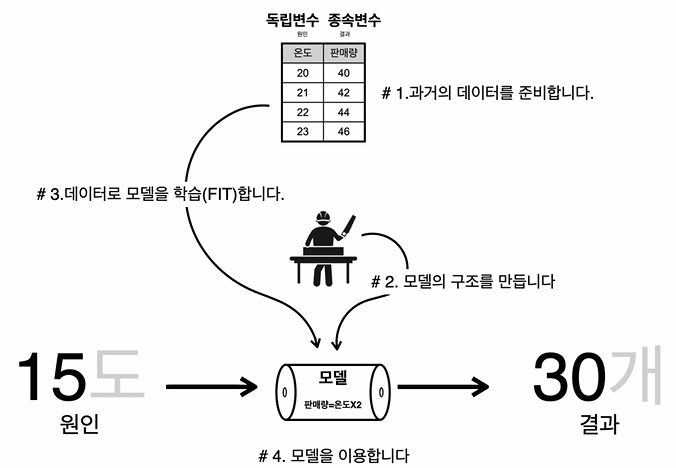
***

1. 과거의 데이터를 준비한다.
```
레몬네이드 = pd.read_csv('lemonage.csv')
독립 = 레몬에이드['온도']
종속 = 레몬에이드['판매량']
print(독립.shape, 종속.shape)
```

2. 모델의 구조를 만든다.
```python
X = tf.keras.layers.Input(shape =[1]) # 여기서 1의 의미는 설정한 독립변수가 1개 이기 때문이다. 
Y = tf.keras.layers.Dense(1)(X) # 여기서 1의 의미는 종속변수가 1개 이기 때문이다.
model = tf.keras.models.Model(X,Y)
model.compile(loss='mse') # 모델이 학습할 방법 정의
```

3. 데이터로 모델을 학습(FIT) 시킨다.
```python
model.fit(독립, 종속, epochs = 1000,verbose=0) # epochs = 모델을 학습시킬 횟수 / verbose = 0 : 출력을 끄고 학습시킨다. 
```
* **loss의 의미**:
학습이 어떻게 진행되고 있는지 출력이 되는데 이때 loss의 의미는 0에 가까워 질 수록 예측을 잘하는 모델이 된다. 

4. 학습시킨 모델을 이용하여 값 예측하기
```python
print("Predictions: ", model.predict([[15]])
```
***

# 1. **뉴런 한개**

## 1.1 레모네이드 판매 예측**[회귀]**
- github csv url: https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/lemonade.csv 

In [1]:
# 라이브러리 사용
import tensorflow as tf
import pandas as pd

In [2]:
# 데이터를 준비합니다.
파일경로 = 'https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/lemonade.csv'
레모네이드 = pd.read_csv(파일경로)
레모네이드.head()

,온도,판매량
0,20,40
1,21,42
2,22,44
3,23,46
4,24,48


In [3]:
# 종속변수, 독립변수
독립 = 레모네이드[['온도']]
종속 = 레모네이드[['판매량']]
print(독립.shape, 종속.shape)

(6, 1) (6, 1)


In [4]:
# 모델을 만듭니다.
X = tf.keras.layers.Input(shape=[1]) # 독립변수, 이때 1의 의미는 독립변수가 1개 이기 때문이다.
Y = tf.keras.layers.Dense(1)(X) # 종속변수, 이때 1의 의미는 종속변수가 1개 이기 때문이다.
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')  # 모델이 학습할 방법 정의

In [5]:
# 모델을 학습시킵니다. 

# print(model.fit(독립, 종속, epochs=10)) # loss값이 0에 가까워야 정답을 잘 맞추는 모델이 된다. 
# 학습이 부족해 보임으로 1000번 학습시킨다.
model.fit(독립, 종속, epochs=1000, verbose=0) # epochs=모델이 학습할 횟수, verbose=0 은 출력을 끄고 학습시기는 코드 이다.
model.fit(독립, 종속 ,epochs =10) # 1000번 학습 시 출력을 끄고 학습 시켰기 때문에 loss 값을 알 수 없어 잘 학습이 됬는지 확인하기 위해 다시 출력을 키고 10번 더 학습시키다.

Epoch 1/10
1/1 [==============================] - 0s 999us/step - loss: 80.1314
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 79.7198
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 79.3093
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 78.8998
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 78.4915
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 78.0843
Epoch 7/10
1/1 [==============================] - 0s 996us/step - loss: 77.6780
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 77.2730
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 76.8689
Epoch 10/10
1/1 [==============================] - 0s 998us/step - loss: 76.4660


In [6]:
# 모델을 이용합니다. 
model.predict(독립)

array([[32.38718 ],
       [33.956165],
       [35.52515 ],
       [37.094135],
       [38.66312 ],
       [40.2321  ]], dtype=float32)

In [7]:
model.predict([[15]])

array([[24.54226]], dtype=float32)

***

## 1.2 보스턴 집값 예측**[회귀]**
- github csv url: https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv 
---
* crim : 범죄율
* chas : 강변
* RM : 평균 방수
* age : 노후주택 비율 
* tax : 재산세 세율 
* ptratio : 학생/교사 비율
* lstat : 하위계층비율
* medv : 집값
---

* **한개**의 뉴런, **13개**의 독립변수, **1개**의 종속변수 로 이루어진 구조 
<img src="https://user-images.githubusercontent.com/85603111/129141554-3b93625b-be80-45fb-800a-2dc35ca5c6b9.png" width=450>

1. 과거의 데이터 준비
```python
보스턴 = pd.read_csv('boston.csv')
독립 = 보스턴[['crim', 'zn', 'indus', 'chas', 'nox' 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']]
종속 = 보스턴['medv']
print(독립.shape, 종속.shape)
```
2. 모델의 구조르 만든다.
```python
X = tf.keras.layers.Input(shape=[13])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss = 'mse') # 모델이 학습할 방법
```
3. 데이터로 모델을 학습(FIT) 시킨다.
```Python
model.fit(독립, 종속, epochs=1000)
```
4. 모델을 이용해 예측해보기
```python
print("Predictions: ", model.predict(독립[0:5])
```
***

In [8]:
import pandas as pd
import tensorflow as tf

In [9]:
# 1.과거의 데이터를 준비합니다.

파일경로 = 'https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv'
보스턴 = pd.read_csv(파일경로)
print(보스턴.shape)
print(보스턴.columns)
보스턴.head()
# 보스턴의 506개 타운의 집값(중앙값)을 보여주는 데이터 이다.
# 13개의 컬럼이 집값에 영향을 주는 독립변수들이다.

(506, 14)
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
보스턴.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [11]:
# 독립변수, 종속변수 분리

독립 = 보스턴[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat']]
종속 = 보스턴[['medv']]
print(독립.shape, 종속.shape)

(506, 13) (506, 1)


In [12]:
# 2. 모델의 구조를 만듭니다

X = tf.keras.layers.Input(shape =[13])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X,Y)
model.compile(loss='mse')

In [13]:
# 3.데이터로 모델을 학습(FIT)합니다.

model.fit(독립, 종속, epochs = 1000, verbose = 0)
model.fit(독립, 종속, epochs = 10)

Epoch 1/10
16/16 [==============================] - 0s 1ms/step - loss: 26.6565
Epoch 2/10
16/16 [==============================] - 0s 997us/step - loss: 26.8460
Epoch 3/10
16/16 [==============================] - 0s 997us/step - loss: 27.0796
Epoch 4/10
16/16 [==============================] - 0s 935us/step - loss: 26.9996
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 26.7313
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 26.8252
Epoch 7/10
16/16 [==============================] - 0s 997us/step - loss: 27.1981
Epoch 8/10
16/16 [==============================] - 0s 997us/step - loss: 26.5672
Epoch 9/10
16/16 [==============================] - 0s 1ms/step - loss: 26.9987
Epoch 10/10
16/16 [==============================] - 0s 1ms/step - loss: 26.2915


In [14]:
# 4. 모델을 이용합니다

print(model.predict(독립[0:5]))

[[29.514277]
 [24.89435 ]
 [30.394659]
 [29.822655]
 [29.130825]]


In [15]:
# 모델을 이용한 것과 실제와 비교 

종속[0:5] # 만족스럽지는 않지만 그럭저럭 예측함

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [16]:
# 모델의 수식 확인

model.get_weights()

[array([[-0.08847589],
        [ 0.07733475],
        [-0.06274084],
        [ 3.450273  ],
        [ 2.362645  ],
        [ 3.705926  ],
        [ 0.01971136],
        [-0.8495519 ],
        [ 0.14523952],
        [-0.00921789],
        [ 0.06069236],
        [ 0.01656286],
        [-0.604159  ]], dtype=float32),
 array([2.9092395], dtype=float32)]

## 1.3 아이리스 품종 **[분류]**
- github csv url: https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/iris.csv 

* 예측하고자 하는 결과값이 범주형임으로 분류 모델을 사용한다.

회귀문제 코드와 어떤 차이가 있는지 눈여겨 볼 겻

1. 과거의 데이터를 준비한다.
```python
아이리스 = pd.read_csv('iris.csv')
아이리스 = pd.get_dummies(아이리스) # 범주형 컬럼을 원핫인고딩 해주는 코드
독립 = 아이리스[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']]
종속 = 아이리스[['품종]]
print(독립.shape, 종속.shape)
```

2. 모델의 구조를 만든다.
```Python
X = tf.keras.layers.Input(shape = [4])
Y = tf.keras.layers.Dense(3, activation = 'softmax')(X) # 
model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy') # 문제에따라 loss를 다르게 사용해야 하는데,
# 분류모델에서 사용하는 loss는 'categorical_crossentropy'이다. 
# 분류모델은 loss보다 사림이 보기에 더 좋은 평가 지표가 있는데 그것이 '정확도', 'accuracy' 이다.
```
3. 데이터로 모델을 학습(FIT) 시키기
```python
model.fit(독립, 종속, epochs = 1000)
```
4. 모델이용하여 확인 
```python
print("Predictions: ", model.predict(독립[0:5])
```

***
### 원핫인코딩(onehot-encoding)
- 범주형 형태를 계산 가능한 숫자 0, 1 형태로 바꾸어 주는것
- `아이리스 = pd.get_dummies(아이리스)`
<img src ='https://user-images.githubusercontent.com/85603111/129147928-ae6fbc09-be86-44e7-9a9e-29037341d2f8.png' width = 500>
<img src ='https://user-images.githubusercontent.com/85603111/129148444-f7cfdd10-1587-45c0-962a-df1540c0f8b8.png' width = 600>
* 이때 Y 값은 -무한대 ~ +무한대 값 대상

### softmax
* 정답을 확률(비율)로 예측하기 위해, 확률로 표현해주도록 하는 도구
* 숙제 : Sigmond 와 Softmas의 차이점
<img src ='https://user-images.githubusercontent.com/85603111/129148872-84d2c6ac-289d-4f05-8d7d-830f0a79e5db.png' width = 500>
* 1 = 100% 
* 0 = 0%
<img src='https://user-images.githubusercontent.com/85603111/129149585-7d897f42-a549-4a10-931e-79c26a4b6376.png' width = 600>
* Y 값은 -무한대~ +무한대 값 대상인데 각 수식을 softmax로 감싸주게 되면 우리가 원하는 0~1 사이의 값으로 반환하도록 해준다.
***
<img src='https://user-images.githubusercontent.com/85603111/129150272-ada28508-4a01-48d5-8116-6f92621fa65a.png' width = 550>

In [17]:
import pandas as pd
import tensorflow as tf

In [18]:
# 1. 과거의 데이터 준비

파일경로 = 'https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/iris.csv'
아이리스 = pd.read_csv(파일경로)
아이리스.head()

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
# 원핫인코딩

인코딩 = pd.get_dummies(아이리스)
인코딩.columns

Index(['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭', '품종_setosa', '품종_versicolor',
       '품종_virginica'],
      dtype='object')

In [20]:
# 독립변수, 종속변수 분리하기.

독립 = 인코딩[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']]
종속 = 인코딩[['품종_setosa', '품종_versicolor', '품종_virginica']]
print(독립.shape, 종속.shape)

(150, 4) (150, 3)


In [21]:
# 2. 모델의 구조를 만든다.

X = tf.keras.layers.Input(shape=[4])
Y = tf.keras.layers.Dense(3, activation ='softmax')(X)
model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics = 'accuracy')

In [22]:
# 3. 데이터로 모델을 학습(FIT) 시킨다.

model.fit(독립, 종속, epochs =100 , verbose=0)
model.fit(독립, 종속, epochs =10)

Epoch 1/10
5/5 [==============================] - 0s 997us/step - loss: 0.6164 - accuracy: 0.7600
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.7733
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.6119 - accuracy: 0.7667
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.6092 - accuracy: 0.7600
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.6075 - accuracy: 0.7667
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6039 - accuracy: 0.7600
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.7733
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6012 - accuracy: 0.7467
Epoch 9/10
5/5 [==============================] - 0s 4ms/step - loss: 0.5974 - accuracy: 0.7600
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.7667


In [23]:
# 4. 모델을 이용한다.

print(model.predict(독립[0:5]))
종속[0:5] # 실제와 비교해보기

[[0.7927802  0.12532829 0.08189149]
 [0.76475745 0.15072836 0.08451419]
 [0.76363367 0.1415997  0.09476662]
 [0.7314388  0.14963113 0.11892995]
 [0.78726804 0.12204199 0.09068992]]


,품종_setosa,품종_versicolor,품종_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [24]:
# 학습한 가중치(weigh)

model.get_weights()

[array([[ 0.08866239, -0.08642231, -0.7865554 ],
        [ 0.20553623, -0.16548991,  0.42060012],
        [-0.5155306 , -0.29736707,  0.5053538 ],
        [-1.3633524 ,  0.55848545, -0.12778607]], dtype=float32),
 array([ 0.23130281, -0.11157979, -0.00431213], dtype=float32)]

# 2. **멀티뉴런**-히든 레이어(hidden layer)
* 히든 레이어를 통해 멀티 레이어를 한다.
<img src='https://user-images.githubusercontent.com/85603111/129159695-ec1c8204-c26f-4ede-adca-933d9c2089fd.png' width=600>
* 13개의 input을 받아 5개의 output을 내는 형태
<img src = 'https://user-images.githubusercontent.com/85603111/129160086-9b701b45-9acf-4e67-b1ad-b387ff4f85d1.png' width=600>
* 5개의 input을 받아 최종 1개의 output을 내는 모델
***

* 코드 :

```python
# 모델의 구조를 만든다.
X = tf.keras.layers.Input(shape=[13])
H = tf.keras.layers.Dense(5, activation = 'swish')(X) 
# 히든레이어의 활성화 함수는 'swish' 사용, swish는 최근에 검증된 성능이 좋은 함수임 
H = tf.keras.layers.Dense(3, activation = 'swish')(H) 
H = tf.keras.layers.Dense(3, activation = 'swish')(H) 
H = tf.keras.layers.Dense(3, activation = 'swish')(H) 
Y = tf.keras.layers.Dense(1)(H) # 여기서 주의할 점은 X가 아니라 H를 넣어주어야 한다는 점
model = tf.keras.models.Model(X,Y)
model.compile(loss = 'mse')
```
```python
# 멀티레이어 모델 확인
model.summary()
```

## 2.1 보스턴 집값 예측**[회귀]**
- github csv url: https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv 

In [25]:
import pandas as pd
import tensorflow as tf

In [26]:
# 1.과거의 데이터를 준비합니다.

파일경로 = 'https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv'
보스턴 = pd.read_csv(파일경로)
print(보스턴.shape)
print(보스턴.columns)
보스턴.head()
# 보스턴의 506개 타운의 집값(중앙값)을 보여주는 데이터 이다.
# 13개의 컬럼이 집값에 영향을 주는 독립변수들이다.

(506, 14)
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [27]:
보스턴.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [28]:
# 독립변수, 종속변수 분리

독립 = 보스턴[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat']]
종속 = 보스턴[['medv']]
print(독립.shape, 종속.shape)

(506, 13) (506, 1)


In [29]:
# 2. 모델의 구조를 만듭니다

X = tf.keras.layers.Input(shape =[13])
H = tf.keras.layers.Dense(10, activation = 'swish')(X)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X,Y)
model.compile(loss='mse')

In [30]:
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [31]:
# 3.데이터로 모델을 학습(FIT)합니다.

model.fit(독립, 종속, epochs = 1000, verbose = 0)
model.fit(독립, 종속, epochs = 10)
# 멀티 레이어를 하지 않았을 때는 loss가 25정도 까지 밖에 안내려갔었는데 지금은 22까지 내려간것을 알 수 있다.

Epoch 1/10
16/16 [==============================] - 0s 935us/step - loss: 23.7926
Epoch 2/10
16/16 [==============================] - 0s 997us/step - loss: 25.9649
Epoch 3/10
16/16 [==============================] - 0s 1ms/step - loss: 23.8255
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 24.6981
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 22.9493
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 25.1605
Epoch 7/10
16/16 [==============================] - 0s 997us/step - loss: 24.8162
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 24.5879
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 24.8092
Epoch 10/10
16/16 [==============================] - 0s 1ms/step - loss: 24.1401


In [32]:
# 4. 모델을 이용합니다

print(model.predict(독립[0:5]))
종속[0:5]# 모델을 이용한 것과 실제와 비교 

[[31.77107 ]
 [26.374968]
 [32.099773]
 [31.724836]
 [30.968939]]


,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## 1.3 아이리스 품종 **[분류]**
- github csv url: https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/iris.csv 

In [33]:
import pandas as pd
import tensorflow as tf

In [34]:
# 1. 과거의 데이터 준비

파일경로 = 'https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/iris.csv'
아이리스 = pd.read_csv(파일경로)
아이리스.head()

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
# 원핫인코딩

인코딩 = pd.get_dummies(아이리스)
인코딩.columns

Index(['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭', '품종_setosa', '품종_versicolor',
       '품종_virginica'],
      dtype='object')

In [36]:
# 독립변수, 종속변수 분리하기.

독립 = 인코딩[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']]
종속 = 인코딩[['품종_setosa', '품종_versicolor', '품종_virginica']]
print(독립.shape, 종속.shape)

(150, 4) (150, 3)


In [37]:
# 2. 모델의 구조를 만든다.

X = tf.keras.layers.Input(shape=[4])
H = tf.keras.layers.Dense(8, activation = 'swish')(X)
H = tf.keras.layers.Dense(8, activation = 'swish')(H)
H = tf.keras.layers.Dense(8, activation = 'swish')(H)
Y = tf.keras.layers.Dense(3, activation ='softmax')(H)
model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics = 'accuracy')

In [38]:
# 3. 데이터로 모델을 학습(FIT) 시킨다.

model.fit(독립, 종속, epochs =100 , verbose=0)
model.fit(독립, 종속, epochs =10)

Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0710 - accuracy: 0.9867
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9867
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0703 - accuracy: 0.9733
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0697 - accuracy: 0.9800
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0658 - accuracy: 0.9867
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9867
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9867
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9867
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0656 - accuracy: 0.9800
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0665 - accuracy: 0.9733


In [39]:
# 4. 모델을 이용한다.

print(model.predict(독립[0:5]))
종속[0:5] # 실제와 비교해보기

[[9.99963403e-01 6.92116089e-07 3.58607249e-05]
 [9.99886036e-01 4.51781852e-06 1.09473534e-04]
 [9.99914169e-01 2.90247544e-06 8.30114514e-05]
 [9.99760687e-01 1.97249774e-05 2.19540671e-04]
 [9.99961853e-01 7.93397305e-07 3.73157709e-05]]


,품종_setosa,품종_versicolor,품종_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


***
# **데이터를 위한 팁**

## 데이터 타입 조정
데이터 : https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/iris2.csv

- 변수(칼럼) 타입 확인: 데이터.dtypes
- 변수를 범주형으로 변경: 
  - 데이터['칼럼명'].astype('category')
- 변수를 수치형으로 변경: 
  - 데이터['칼럼명'].astype('int')
  - 데이터['칼럼명'].astype('float')
- NA 값의 처리 
  - NA 갯수 체크: 데이터.isna().sum()
  - NA 값 채우기: 데이터['칼럼명'].fillna(특정숫자)

In [40]:
# 라이브러리 사용
import pandas as pd

In [41]:
# 파일 읽어오기
파일경로 = 'https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/iris2.csv'
아이리스 = pd.read_csv(파일경로)
아이리스.head()

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
# 칼럼의 데이터 타입 체크
print(아이리스.dtypes)
# 원핫인코딩을 위해서 품종 데이터 타입을 범주형으로 바꾸어 주어야 함.

꽃잎길이     float64
꽃잎폭      float64
꽃받침길이    float64
꽃받침폭     float64
품종         int64
dtype: object


In [43]:
# 품종 타입을 범주형으로 바꾸어 준다. 
아이리스['품종'] = 아이리스['품종'].astype('category')
print(아이리스.dtypes)

꽃잎길이      float64
꽃잎폭       float64
꽃받침길이     float64
꽃받침폭      float64
품종       category
dtype: object


In [44]:
# 카테고리 타입의 변수만 원핫인코딩
인코딩 = pd.get_dummies(아이리스)
인코딩.head()

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종_0,품종_1,품종_2
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [45]:
# NA값을 체크해 봅시다. 
print(아이리스.isna().sum()) # 꽃잎폭에 결측치가 1개 있음

아이리스.tail()

꽃잎길이     0
꽃잎폭      1
꽃받침길이    0
꽃받침폭     0
품종       0
dtype: int64


,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,NaN,5.1,1.8,2


In [46]:
# NA값에 꽃잎폭 평균값을 넣어주는 방법

mean = 아이리스['꽃잎폭'].mean()
print(mean)
아이리스['꽃잎폭'] = 아이리스['꽃잎폭'].fillna(mean)
아이리스.tail()

3.0543624161073835


,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종
145,6.7,3.000000,5.2,2.3,2
146,6.3,2.500000,5.0,1.9,2
147,6.5,3.000000,5.2,2.0,2
148,6.2,3.400000,5.4,2.3,2
149,5.9,3.054362,5.1,1.8,2


***
# **모델을 위한 팁**

## 학습이 잘되는 모델★

- 사용할 레이어
  - **tf.keras.layers.BatchNormalization()**
  - **tf.keras.layers.Activation('swish')**

- 데이터
  - 보스턴 집값 예측: https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv
  - 아이리스 품종 분류: https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/iris.csv 


### 보스턴 집값 예측

In [47]:
# 1.과거의 데이터를 준비합니다.
파일경로 = 'https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv'
보스턴 = pd.read_csv(파일경로)

# 종속변수, 독립변수
독립 = 보스턴[['crim', 'zn', 'indus', 'chas', 'nox', 
            'rm', 'age', 'dis', 'rad', 'tax',
            'ptratio', 'b', 'lstat']]
종속 = 보스턴[['medv']]
print(독립.shape, 종속.shape)

(506, 13) (506, 1)


In [48]:
# 2. 모델의 구조를 만듭니다
X = tf.keras.layers.Input(shape=[13])
H = tf.keras.layers.Dense(8, activation='swish')(X)
H = tf.keras.layers.Dense(8, activation='swish')(H)
H = tf.keras.layers.Dense(8, activation='swish')(H)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

In [49]:
# 2. 모델의 구조를 BatchNormalization layer를 사용하여 만든다.
X = tf.keras.layers.Input(shape=[13])

H = tf.keras.layers.Dense(8)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

In [50]:
# 3.데이터로 모델을 학습(FIT)합니다.
model.fit(독립, 종속, epochs=1000,verbose=0)
model.fit(독립, 종속, epochs=10)

Epoch 1/10
16/16 [==============================] - 0s 1ms/step - loss: 13.2176
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 13.9661
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 11.7912
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 9.6760
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 12.7701
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 11.1760
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 12.1613
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 12.8038
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 10.1279
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 12.4341


### 아이리스 품종

In [51]:
# 1.과거의 데이터를 준비합니다.
파일경로 = 'https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/iris.csv'
아이리스 = pd.read_csv(파일경로)

# 원핫인코딩
아이리스 = pd.get_dummies(아이리스)

# 종속변수, 독립변수
독립 = 아이리스[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']]
종속 = 아이리스[['품종_setosa', '품종_versicolor', '품종_virginica']]
print(독립.shape, 종속.shape)

(150, 4) (150, 3)


In [52]:
# 2. 모델의 구조를 만듭니다
X = tf.keras.layers.Input(shape=[4])
H = tf.keras.layers.Dense(8, activation='swish')(X)
H = tf.keras.layers.Dense(8, activation='swish')(H)
H = tf.keras.layers.Dense(8, activation='swish')(H)
Y = tf.keras.layers.Dense(3, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy',
              metrics='accuracy')

In [53]:
# 2. 모델의 구조를 BatchNormalization layer를 사용하여 만든다.
# 위에랑 똑같이 3개의 레이어를 쌓은것은데 batchnormalizationrhk activation을 따로 빼주었다.

X = tf.keras.layers.Input(shape=[4])

H = tf.keras.layers.Dense(8)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

Y = tf.keras.layers.Dense(3, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy',
              metrics='accuracy')

In [54]:
# 3.데이터로 모델을 학습(FIT)합니다.
model.fit(독립, 종속, epochs=1000, verbose=0)
model.fit(독립, 종속, epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9867
Epoch 2/10
5/5 [==============================] - 0s 5ms/step - loss: 0.0346 - accuracy: 0.9933
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9667
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9867
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9867
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9800
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 0.1248 - accuracy: 0.9667
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0560 - accuracy: 0.9733
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9867
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0671 - accuracy: 0.9800
